In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
plt.style.use('ggplot')

In [2]:
counts = pd.read_csv('FremontHourly1.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('SeaTacWeather.csv', index_col='DATE', parse_dates=True)

In [3]:
counts.head()

,Fremont Bridge NB,Fremont Bridge SB
Date,,
2012-10-03 01:00:00,9.0,4.0
2012-10-03 02:00:00,6.0,4.0
2012-10-03 03:00:00,1.0,1.0
2012-10-03 04:00:00,3.0,2.0
2012-10-03 05:00:00,1.0,6.0


In [4]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT14,WT01,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,233,89,30,40,30,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,178,100,41,10,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,78,73,10,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,83,65,20,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,217,89,57,360,360,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


## total daily bicycle traffic, and put this in its own DataFrame:

In [5]:
daily = counts.resample('d', how='sum')
#daily

daily['Total'] = daily.sum(axis=1)

daily 
#daily.columns['NB','SB']

C:\Users\hp\Anaconda33\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


,Fremont Bridge NB,Fremont Bridge SB,Total
Date,,,
2012-10-03,1749.0,1755.0,3504.0
2012-10-04,1749.0,1702.0,3451.0
2012-10-05,1604.0,1553.0,3157.0
2012-10-06,923.0,1081.0,2004.0
2012-10-07,959.0,1201.0,2160.0
2012-10-08,1706.0,1823.0,3529.0
2012-10-09,1741.0,1761.0,3502.0
2012-10-10,1588.0,1647.0,3235.0
2012-10-11,1465.0,1572.0,3037.0


# WEEKLY

In [6]:
weekly = counts.resample('w', how='sum')
weekly['Total'] = weekly.sum(axis=1)
weekly

C:\Users\hp\Anaconda33\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


,Fremont Bridge NB,Fremont Bridge SB,Total
Date,,,
2012-10-07,6984.0,7292.0,14276.0
2012-10-14,8120.0,8681.0,16801.0
2012-10-21,7564.0,7948.0,15512.0
2012-10-28,6537.0,6901.0,13438.0
2012-11-04,5784.0,6407.0,12191.0
2012-11-11,7274.0,7743.0,15017.0
2012-11-18,5796.0,6076.0,11872.0
2012-11-25,3322.0,3526.0,6848.0
2012-12-02,5661.0,5879.0,11540.0


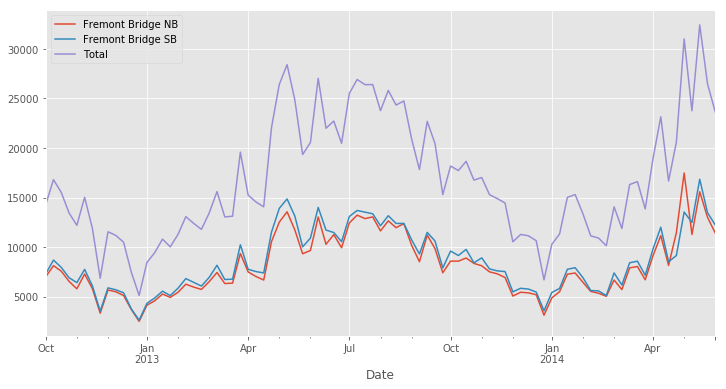

In [7]:
weekly[['Fremont Bridge NB','Fremont Bridge SB', 'Total']].plot(figsize=(12,6))

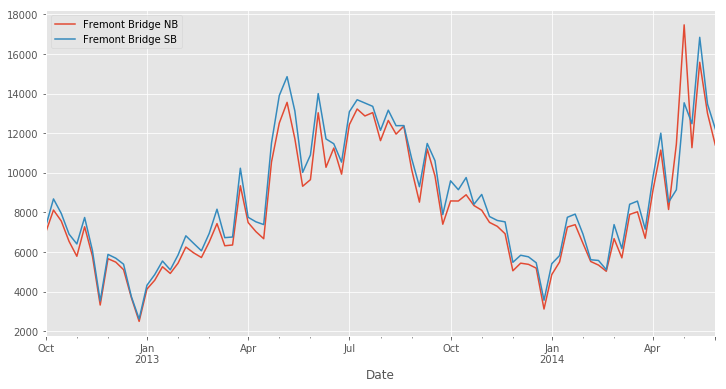

In [8]:
weekly[['Fremont Bridge NB','Fremont Bridge SB']].plot(figsize=(12,6))

# Daily

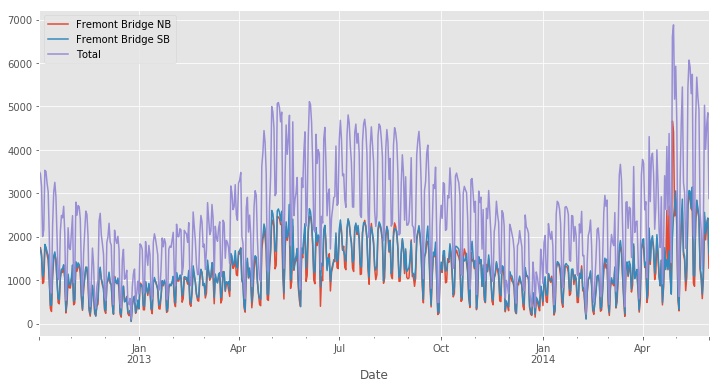

In [9]:
daily[['Fremont Bridge NB','Fremont Bridge SB', 'Total']].plot(figsize=(12,6))

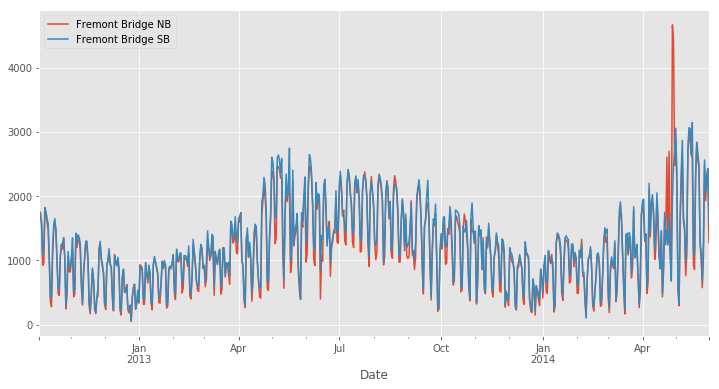

In [10]:
daily[['Fremont Bridge NB','Fremont Bridge SB']].plot(figsize=(12,6))

In [11]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
daily.head()    
#daily.index.dayofweek

,Fremont Bridge NB,Fremont Bridge SB,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,,
2012-10-03,1749.0,1755.0,3504.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,1749.0,1702.0,3451.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,1604.0,1553.0,3157.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,923.0,1081.0,2004.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,959.0,1201.0,2160.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Public holiday

In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [13]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [14]:
#pd.Series(1 , index=holidays, name='holiday')

  
  # DAYLIqt

In [15]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
    * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.


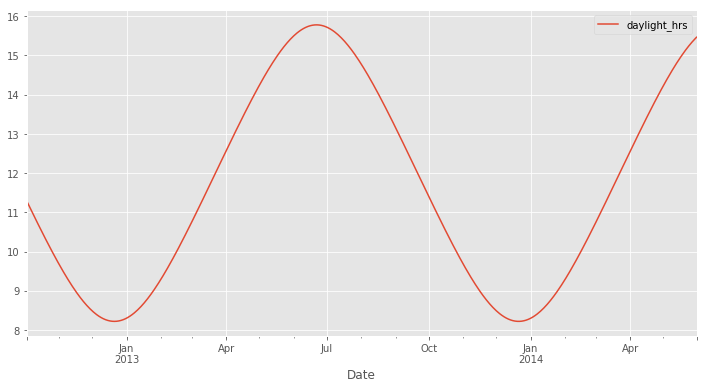

In [16]:
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot(figsize=(12,6));

# # temperatures are in 1/10 deg C; convert to C

In [17]:
weather['TMIN']/= 10
weather['TMAX']/=10
weather['Temp (c)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])


# #  precip is in 1/10 mm; convert to inches

In [18]:

weather['PRCP'] /=254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)




# DAILY

In [19]:
daily = daily.join(weather[['PRCP', 'Temp (c)', 'dry day']])
daily.head()


,Fremont Bridge NB,Fremont Bridge SB,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (c),dry day
Date,,,,,,,,,,,,,,,
2012-10-03,1749.0,1755.0,3504.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1
2012-10-04,1749.0,1702.0,3451.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1
2012-10-05,1604.0,1553.0,3157.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1
2012-10-06,923.0,1081.0,2004.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1
2012-10-07,959.0,1201.0,2160.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1


# WEEKLY

In [20]:

weekly = weekly.join(weather[['PRCP', 'Temp (c)', 'dry day']])
weekly.head()

,Fremont Bridge NB,Fremont Bridge SB,Total,PRCP,Temp (c),dry day
Date,,,,,,
2012-10-07,6984.0,7292.0,14276.0,0.000000,15.85,1
2012-10-14,8120.0,8681.0,16801.0,0.649606,15.55,0
2012-10-21,7564.0,7948.0,15512.0,0.251969,8.05,0
2012-10-28,6537.0,6901.0,13438.0,0.240157,12.20,0
2012-11-04,5784.0,6407.0,12191.0,0.318898,15.30,0


In [21]:
weekly['daylight_hrs'] = list(map(hours_of_daylight, weekly.index))
weekly.head()

,Fremont Bridge NB,Fremont Bridge SB,Total,PRCP,Temp (c),dry day,daylight_hrs
Date,,,,,,,
2012-10-07,6984.0,7292.0,14276.0,0.000000,15.85,1,11.045208
2012-10-14,8120.0,8681.0,16801.0,0.649606,15.55,0,10.644852
2012-10-21,7564.0,7948.0,15512.0,0.251969,8.05,0,10.255305
2012-10-28,6537.0,6901.0,13438.0,0.240157,12.20,0,9.881095
2012-11-04,5784.0,6407.0,12191.0,0.318898,15.30,0,9.527645


# Annual


In [22]:
daily['annual'] = (daily.index- daily.index[0]).days / 365
weekly['Annual'] = (weekly.index - weekly.index[0]).days/52

# DAILY

In [23]:
#mydaily = daily.drop(['holiday_right','holiday_left','holiday_a','holiday_b','holida'], axis=1)
daily.head()


,Fremont Bridge NB,Fremont Bridge SB,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (c),dry day,annual
Date,,,,,,,,,,,,,,,,
2012-10-03,1749.0,1755.0,3504.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1,0.000000
2012-10-04,1749.0,1702.0,3451.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.002740
2012-10-05,1604.0,1553.0,3157.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.005479
2012-10-06,923.0,1081.0,2004.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.008219
2012-10-07,959.0,1201.0,2160.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1,0.010959


# Accountin for DayOfweek

Text(0,0.5,'Number Of Riders')

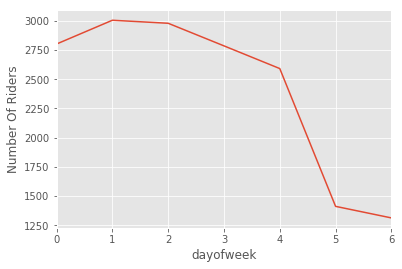

In [24]:
daily['dayofweek'] = daily.index.dayofweek
grouped = daily.groupby('dayofweek')['Total'].mean()
grouped.plot()
plt.ylabel('Number Of Riders')


#  weekly

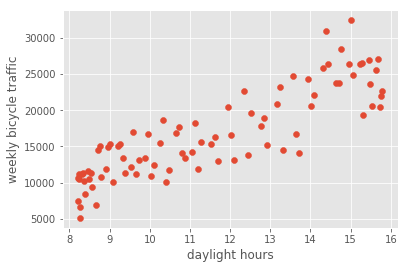

In [25]:
weekly.head()
plt.scatter(weekly['daylight_hrs'], weekly['Total'])
plt.xlabel('daylight hours')
plt.ylabel('weekly bicycle traffic');

In [26]:
from sklearn.linear_model import LinearRegression

X = weekly[['daylight_hrs']].to_dense()
y = weekly['Total']
clf = LinearRegression(fit_intercept=True).fit(X, y)

weekly['daylight_trend'] = clf.predict(X)

Xd = daily[['daylight_hrs']].to_dense()
y = daily['Total']
clff = LinearRegression(fit_intercept=True).fit(Xd, y)

daily['daylight_trend'] = clff.predict(Xd)

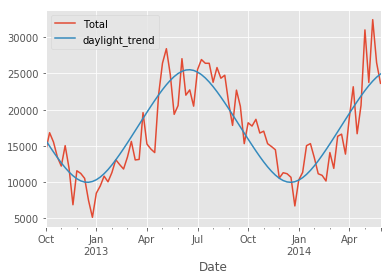

In [27]:
weekly['dy'] = weekly['daylight_hrs']

weekly[['Total','daylight_trend']].plot()


# Prediction

In [46]:
from sklearn.cross_validation import train_test_split
daily['daycount'] = np.arange(len(daily))
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
'daylight_trend', 'daylight_hrs','daycount','PRCP', 'dry day', 'Temp (c)', 'annual']



In [47]:
X = daily[column_names]
y = daily['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


model = LinearRegression(fit_intercept = False)

model.fit(X,y)
daily['predicted'] = model.predict(X)


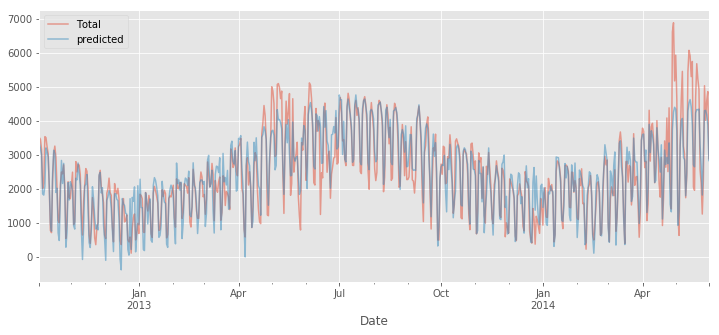

In [48]:
daily[['Total', 'predicted']].plot(alpha=0.5, figsize=(12,5))
#plt.plot(y_test,ypred)

In [49]:
from sklearn.metrics import accuracy_score


# we can take a look at the coefficients of the linear model to estimate how much
# each feature contributes to the daily bicycle count:

In [50]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon                484.514903
Tue                541.153315
Wed                581.189738
Thu                413.657040
Fri                131.498131
Sat              -1051.910410
Sun              -1078.465329
holiday          -1208.198585
daylight_trend       0.201032
daylight_hrs        75.992478
daycount             0.554004
PRCP              -658.609425
dry day            562.434905
Temp (c)            64.968644
annual               0.001518
dtype: float64

In [51]:

from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
             for i in range(1000)], 0)
print(pd.DataFrame({'effect': (params.round(0)),'error': err.round(0)}))

                effect  error
Mon              485.0   56.0
Tue              541.0   51.0
Wed              581.0   48.0
Thu              414.0   48.0
Fri              131.0   56.0
Sat            -1052.0   41.0
Sun            -1078.0   42.0
holiday        -1208.0  195.0
daylight_trend     0.0    0.0
daylight_hrs      76.0   22.0
daycount           1.0    0.0
PRCP            -659.0   72.0
dry day          562.0   47.0
Temp (c)          65.0    5.0
annual             0.0    0.0


c

# CONCLUSION

# # Based on Rain

Our model shows that once all other factors are accounted for, every inch of rain translates, on average, to about 600 cyclists staying home. Not a surprising result, but it's interesting to see it quantified!

## Based on Temp 


We see that for every increase of one degree, we add around 65 crossings on the Fremont bridge!


## Based on Dry day

 for every dry day i.e a day wit no Rain We  have over 562 bikes on road 

## Based On Dayliqt 

We see that, once the effects of rain and temperature are removed, each hour of daylight results in about 76 more crossings at the Fremont Bridge.
this is because our first model did not include precipitation and temperature: apparently the weather is far more important than the darkness in affecting ridership!